In [2]:
import torch
torch.cuda.is_available()

True

## Setup

In [3]:
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
import numpy as np

In [4]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn' # default values for this plotter
def get_section_results(file, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == X_label:
                X.append(v.simple_value)
            elif v.tag == Y_label:
                Y.append(v.simple_value)
    return X, Y

def getXY(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    logdir = '/home/harvey/Documents/cs285/homework_fall2022/hw5/data/%s/events*'%exp_name
    eventfile = glob.glob(logdir)[0]
    X, Y = get_section_results(eventfile, X_label=X_label, Y_label=Y_label)
    return X, Y

def check(exp_name, X_label='Train_EnvstepsSoFar', Y_label='Train_AverageReturn'):
    X, Y = getXY(exp_name, X_label, Y_label)
    for i, (x, y) in enumerate(zip(X, Y)):
        print('Iteration {:d} | Train steps: {:d} | Return: {}'.format(i, int(x), y))

## Names

In [62]:
q11 = "hw5_expl_q1_env1_rnd_PointmassEasy-v0_21-11-2022_14-40-21"
q12 = "hw5_expl_q1_env1_random_PointmassEasy-v0_21-11-2022_15-37-36"
q14 = "hw5_expl_q1_env2_random_PointmassMedium-v0_21-11-2022_16-10-24"
q13 = "hw5_expl_q1_env2_rnd_PointmassMedium-v0_21-11-2022_15-57-41"
q15 = "hw5_expl_q1_boltzman_med_PointmassMedium-v0_21-11-2022_16-29-39"
q16 = "hw5_expl_q1_boltzman_hard_PointmassHard-v0_21-11-2022_20-44-46"
q17 = "hw5_expl_q1_rnd_hard_PointmassHard-v0_21-11-2022_21-41-09"

q21 = "hw5_expl_q2_dqn_PointmassMedium-v0_21-11-2022_21-48-43"
q21s41 = "hw5_expl_q2_dqn_PointmassMedium-v0_21-11-2022_22-03-48"
q22 = "hw5_expl_q2_cql_PointmassMedium-v0_21-11-2022_21-22-20"
q23 = "hw5_expl_q2_cql_no_scale_PointmassMedium-v0_21-11-2022_22-05-57"

# q2part 2
q2p21 = "hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_21-11-2022_22-16-04"
q2p22 = "hw5_expl_q2_dqn_numsteps_5000_PointmassMedium-v0_21-11-2022_22-27-21"
q2p23 = "hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_21-11-2022_22-38-20"

# q2part 3
q2p31 = "hw5_expl_q2_alpha0.02_PointmassMedium-v0_21-11-2022_22-32-48"


In [38]:
# check(q12)

# HW5 Report

## Problem 1

Text(0.5, 1.0, 'Problem 1 Easy Env')

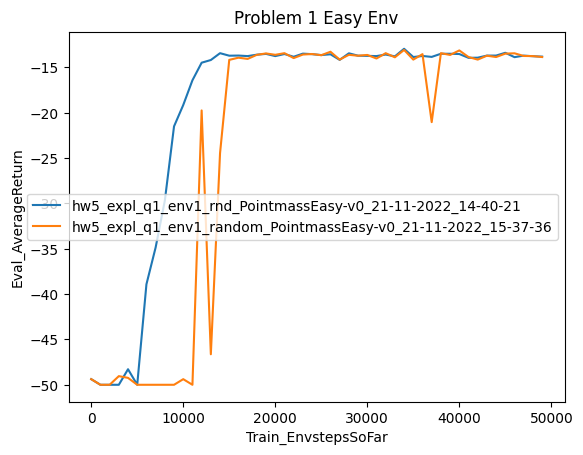

In [39]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q11, q12]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 1 Easy Env")

Text(0.5, 1.0, 'Problem 1 Medium Env')

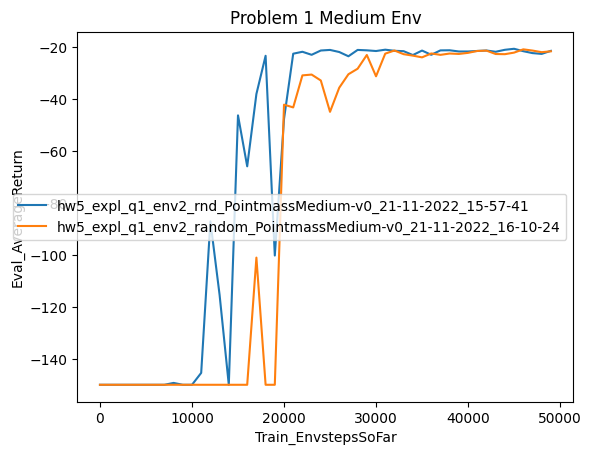

In [40]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q13, q14]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 1 Medium Env")

Text(0.5, 1.0, 'Problem 1 Boltzman Medium')

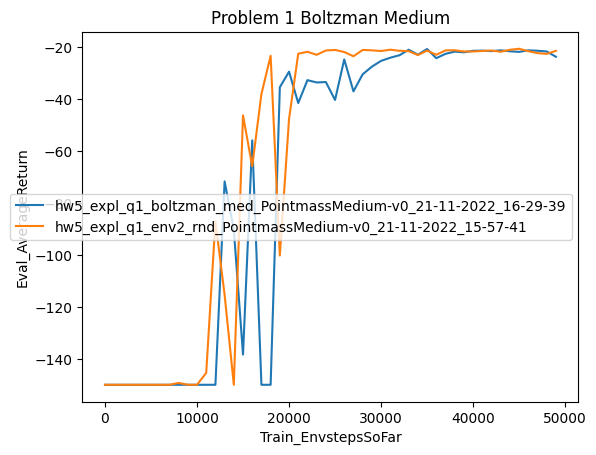

In [41]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q15, q13]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 1 Boltzman Medium")

Text(0.5, 1.0, 'Problem 1 Boltzman Hard')

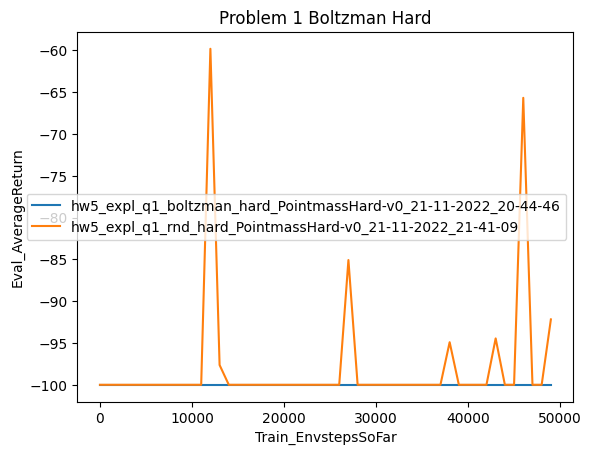

In [42]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q16, q17]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 1 Boltzman Hard")

## Problem 2

Text(0.5, 1.0, 'Problem 2 subpart 1')

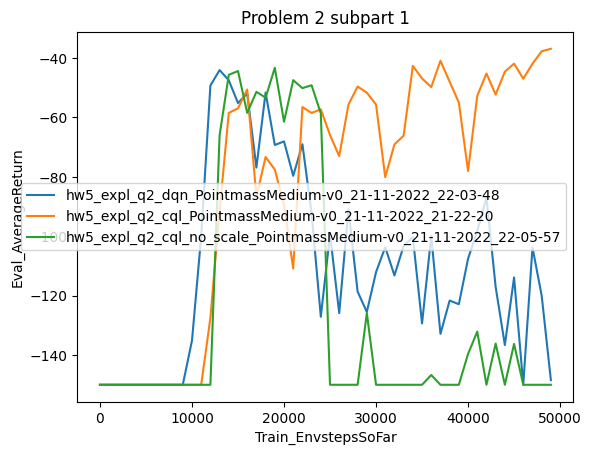

In [61]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q21s41, q22, q23] # q23

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 2 subpart 1")

#### Why shift and scaling matters?

The degree to which our model is conservative relies on the magnitude of the rewards. Our shift and scaling scales up the magnitude of the rewards and change the behavior of the conservative agent. 

Since the environment gives -1 reward except when reaching the goal and 0 when reaching the goal, this scaling makes the rewards more well conditioned. 

Text(0.5, 1.0, 'Problem 2 subpart 2')

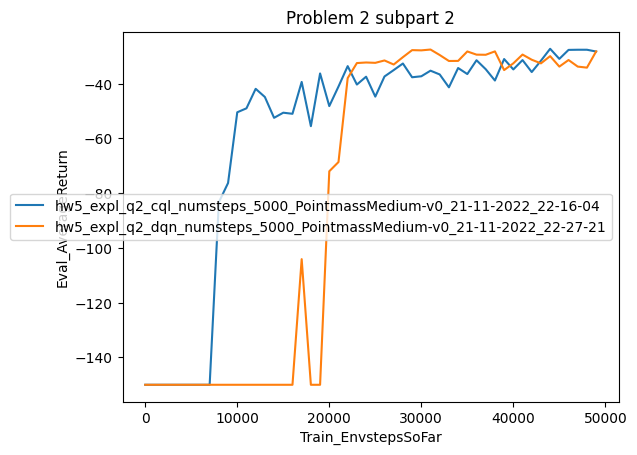

In [66]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q2p21, q2p22] #

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 2 subpart 2")

Text(0.5, 1.0, 'Problem 2 subpart 3')

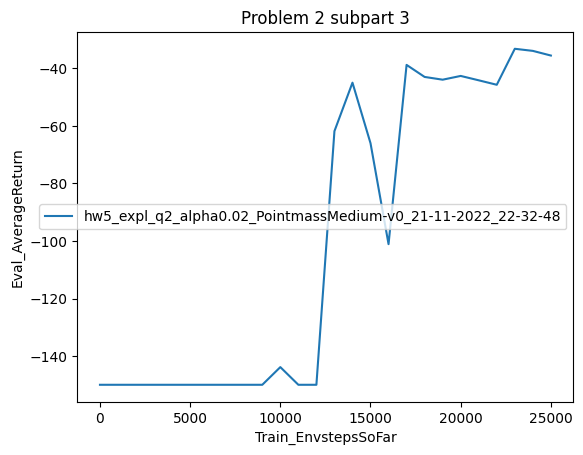

In [65]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q2p31] #

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 2 subpart 3")

## Problem 3

Text(0.5, 1.0, 'Problem 3')

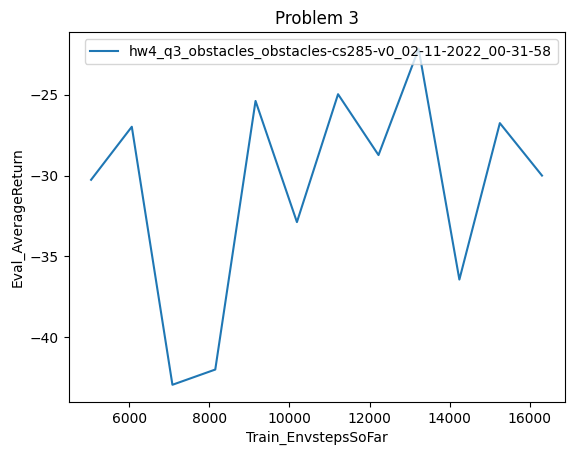

In [12]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q31name, q32name, q33name, q3test1]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 3")

## Problem 4

Text(0.5, 1.0, 'Problem 4: Horizon')

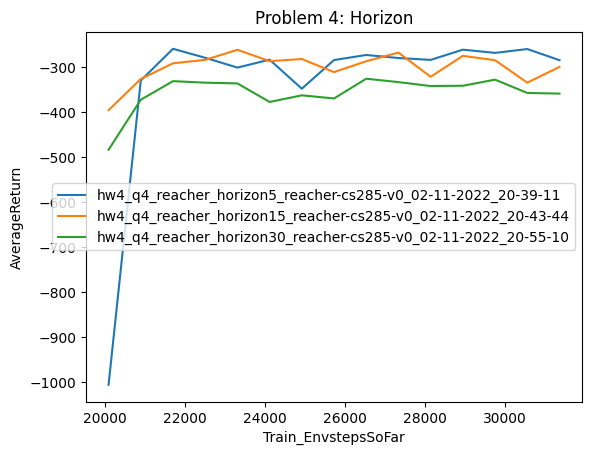

In [19]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q41name, q42name, q43name]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: Horizon")

Text(0.5, 1.0, 'Problem 4: number of candidate actiion sequences')

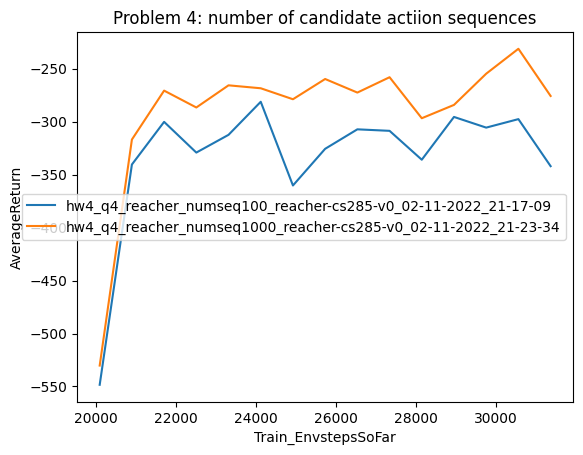

In [21]:
exp_names = [q44name, q45name]
for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: number of candidate actiion sequences")

Text(0.5, 1.0, 'Problem 4: ensemble size')

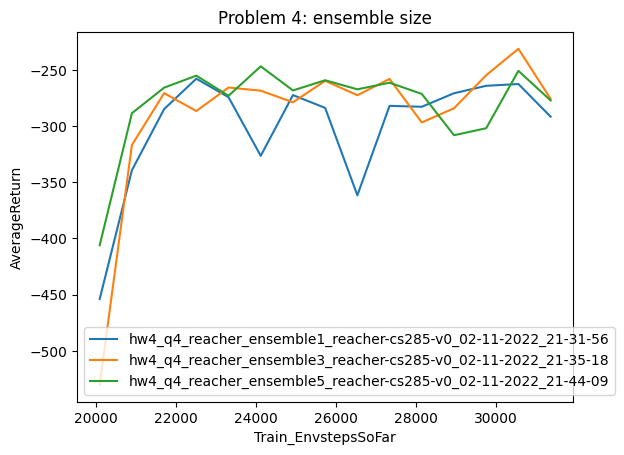

In [22]:
exp_names = [q46name, q47name, q48name]
for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel("AverageReturn")
plt.legend()

plt.title("Problem 4: ensemble size")

## Problem 5

Text(0.5, 1.0, 'Problem 5')

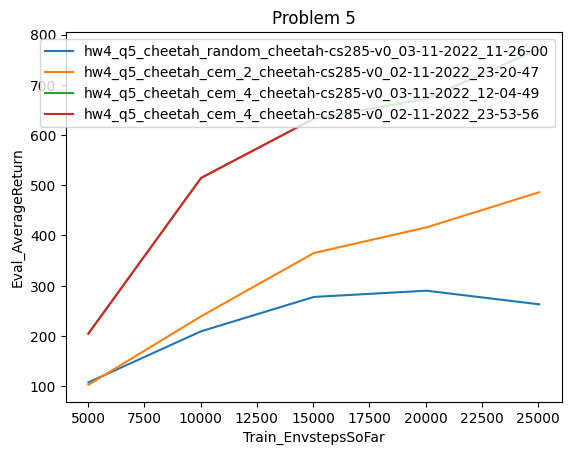

In [19]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q51name, q52name, q53name, q53incomplete]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 5")

In [18]:
check(q53name, X_label, Y_label)

Iteration 0 | Train steps: 5010 | Return: 204.62315368652344
Iteration 1 | Train steps: 10020 | Return: 514.4876708984375
Iteration 2 | Train steps: 15030 | Return: 632.50390625
Iteration 3 | Train steps: 20040 | Return: 671.9439697265625
Iteration 4 | Train steps: 25050 | Return: 771.5823974609375


# Problem 6

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0.5, 1.0, 'Problem 6')

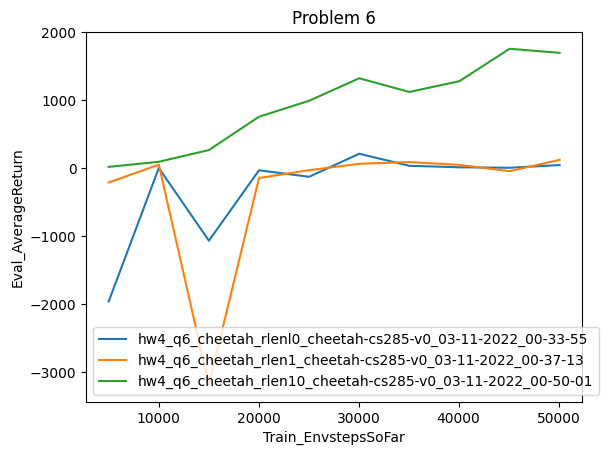

In [5]:
X_label='Train_EnvstepsSoFar'
Y_label='Eval_AverageReturn'

exp_names = [q61name, q62name, q63name]

for exp_name in exp_names:
    X, Y = getXY(exp_name, X_label=X_label, Y_label=Y_label)
    plt.plot(X, Y, label=exp_name)
plt.xlabel(X_label)
plt.ylabel(Y_label)
plt.legend()

plt.title("Problem 6")

### We see that longer rollout length leads to lower variances and better average return in general. 